<a href="https://colab.research.google.com/github/mjgpinheiro/Econophysics/blob/main/Power_law_stockmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  5 of 5 completed


Estimated power law exponent (negative tail): -0.45
Estimated power law exponent (positive tail): -0.09

Current volatility estimate (20-day rolling):
Ticker
AAPL    0.051535
AMZN    0.044318
GOOG    0.033353
META    0.049111
MSFT    0.031229
Name: 2025-04-24 00:00:00, dtype: float64

Risk Forecast for AAPL:
  Probability of >3% crash in a day next week: 16.70%
  Probability of >3% rally in a day next week: 14.40%

Risk Forecast for MSFT:
  Probability of >3% crash in a day next week: 16.00%
  Probability of >3% rally in a day next week: 5.40%

Risk Forecast for GOOG:
  Probability of >3% crash in a day next week: 22.80%
  Probability of >3% rally in a day next week: 10.80%

Risk Forecast for AMZN:
  Probability of >3% crash in a day next week: 20.30%
  Probability of >3% rally in a day next week: 19.80%

Risk Forecast for META:
  Probability of >3% crash in a day next week: 29.00%
  Probability of >3% rally in a day next week: 30.80%


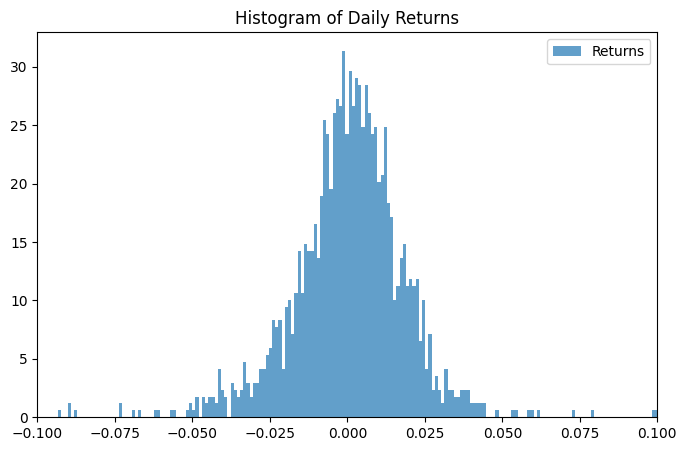

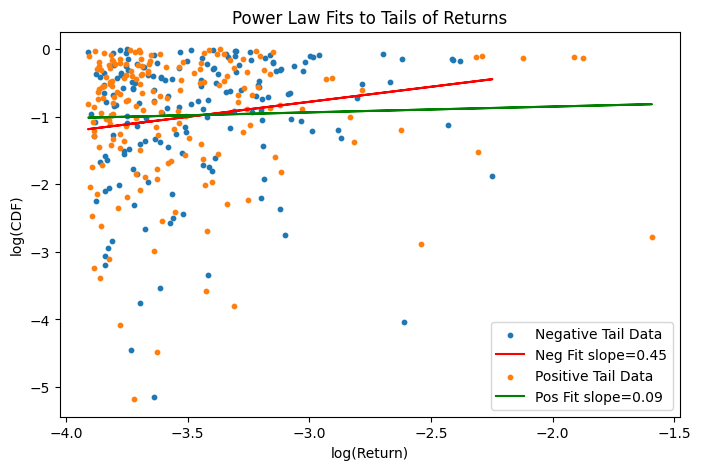

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Download stock data
stocks = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META']
data = yf.download(stocks, start='2024-01-01', end='2025-04-25')['Close']

# Step 2: Calculate daily returns
returns = data.pct_change().dropna()
all_returns = returns.stack()

# Step 3: Analyze negative tail (crashes)
neg_tail = all_returns[all_returns < -0.02]
x_neg = np.abs(neg_tail)
logx_neg = np.log(x_neg)
logy_neg = np.log(np.arange(1, len(x_neg)+1)/len(x_neg))
slope_neg, intercept_neg, _, _, _ = stats.linregress(logx_neg, logy_neg)

# Step 4: Analyze positive tail (rallies)
pos_tail = all_returns[all_returns > 0.02]
x_pos = pos_tail
logx_pos = np.log(x_pos)
logy_pos = np.log(np.arange(1, len(x_pos)+1)/len(x_pos))
slope_pos, intercept_pos, _, _, _ = stats.linregress(logx_pos, logy_pos)

print(f"Estimated power law exponent (negative tail): {-slope_neg:.2f}")
print(f"Estimated power law exponent (positive tail): {-slope_pos:.2f}")

# Step 5: Volatility forecast
rolling_vol = returns.rolling(window=20).std()
current_vol = rolling_vol.iloc[-1]
print("\nCurrent volatility estimate (20-day rolling):")
print(current_vol)

# Step 6: Simulate next week returns
np.random.seed(42)
simulated_returns = {}
for stock in stocks:
    sim_returns = np.random.choice(returns[stock].dropna(), size=5*1000, replace=True)
    sim_returns = sim_returns.reshape(1000, 5)  # 1000 simulations for 5 days
    simulated_returns[stock] = sim_returns

# Step 7: Analyze simulation results
for stock in stocks:
    print(f"\nRisk Forecast for {stock}:")
    sim = simulated_returns[stock]
    prob_crash = np.mean(np.min(sim, axis=1) < -0.03)
    prob_rally = np.mean(np.max(sim, axis=1) > 0.03)
    print(f"  Probability of >3% crash in a day next week: {prob_crash*100:.2f}%")
    print(f"  Probability of >3% rally in a day next week: {prob_rally*100:.2f}%")

# Step 8: Plot histogram of returns
plt.figure(figsize=(8,5))
plt.hist(all_returns, bins=300, density=True, alpha=0.7, label='Returns')
plt.xlim(-0.1, 0.1)
plt.title('Histogram of Daily Returns')
plt.legend()
plt.show()

# Step 9: Plot power law fits
plt.figure(figsize=(8,5))
plt.scatter(logx_neg, logy_neg, s=10, label='Negative Tail Data')
plt.plot(logx_neg, intercept_neg + slope_neg*logx_neg, color='red', label=f'Neg Fit slope={slope_neg:.2f}')
plt.scatter(logx_pos, logy_pos, s=10, label='Positive Tail Data')
plt.plot(logx_pos, intercept_pos + slope_pos*logx_pos, color='green', label=f'Pos Fit slope={slope_pos:.2f}')
plt.xlabel('log(Return)')
plt.ylabel('log(CDF)')
plt.title('Power Law Fits to Tails of Returns')
plt.legend()
plt.show()
